In [ ]:
import torch
from diffusers import StableDiffusionPipeline, DDIMScheduler
from diffusers.utils import load_image

pipeline = StableDiffusionPipeline.from_pretrained(
    "runwayml/stable-diffusion-v1-5",
    torch_dtype=torch.float16,
    cache_dir="/vol/paramonos2/projects/antoni/.cache",
).to("cuda")
pipeline.scheduler = DDIMScheduler.from_config(pipeline.scheduler.config)
pipeline.load_ip_adapter("h94/IP-Adapter", subfolder="models", weight_name="ip-adapter-full-face_sd15.bin")

pipeline.set_ip_adapter_scale(1.0)

In [ ]:
import torch
from diffusers import StableDiffusionPipeline, DDIMScheduler
from diffusers.utils import load_image

pipeline_2_1 = StableDiffusionPipeline.from_pretrained(
    "stabilityai/stable-diffusion-2-1-base",
    torch_dtype=torch.float16,
    cache_dir="/vol/paramonos2/projects/antoni/.cache",
).to("cuda")
# pipeline_2_1.scheduler

: 

In [9]:
import torch
from diffusers import StableDiffusionPipeline

pipeline_1_5 = StableDiffusionPipeline.from_pretrained(
    "runwayml/stable-diffusion-v1-5",
    # torch_dtype=torch.float16,
    cache_dir="/vol/paramonos2/projects/antoni/.cache",
).to("cuda")

Loading pipeline components...: 100%|██████████| 7/7 [00:00<00:00,  7.99it/s]


In [11]:
prompt_embeds, negative_prompt_embeds = pipeline_1_5.encode_prompt(
    "Chybre",
    "cuda",
    1,
    False,
)
prompt_embeds

tensor([[[-0.3884,  0.0229, -0.0522,  ..., -0.4899, -0.3066,  0.0675],
         [-0.1189,  1.0663,  2.0914,  ...,  0.3393, -0.4146,  0.6376],
         [ 0.2818,  0.9080,  1.7518,  ...,  1.0331, -0.2975, -0.3620],
         ...,
         [ 0.9049, -0.0348,  0.5000,  ...,  2.3313, -0.7853, -0.6802],
         [ 0.8800, -0.0329,  0.5009,  ...,  2.3420, -0.8227, -0.6749],
         [ 0.9519,  0.0401,  0.5483,  ...,  2.2692, -0.7291, -0.6433]]],
       device='cuda:0', grad_fn=<ViewBackward0>)

In [6]:
import sys

sys.path.append("..")
from sgm.modules.encoders.modules import FrozenCLIPEmbedder

embedder = FrozenCLIPEmbedder(layer="last")

model.safetensors: 100%|██████████| 1.71G/1.71G [00:15<00:00, 112MB/s] 


In [22]:
embedder = embedder.to("cuda")
emb = embedder("Chybre")
emb

tensor([[[-0.3883,  0.0229, -0.0520,  ..., -0.4898, -0.3066,  0.0674],
         [-0.1190,  1.0676,  2.0905,  ...,  0.3391, -0.4161,  0.6374],
         [ 0.2763,  0.9094,  1.7510,  ...,  1.0331, -0.2992, -0.3645],
         ...,
         [ 0.9047, -0.0336,  0.4978,  ...,  2.3328, -0.7846, -0.6800],
         [ 0.8800, -0.0305,  0.4989,  ...,  2.3419, -0.8218, -0.6741],
         [ 0.9512,  0.0413,  0.5462,  ...,  2.2694, -0.7275, -0.6435]]],
       device='cuda:0')

In [19]:
emb.shape, prompt_embeds.shape

(torch.Size([1, 77, 768]), torch.Size([1, 77, 768]))

In [23]:
torch.nn.functional.cosine_similarity(emb, prompt_embeds, dim=-1).squeeze()

tensor([1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000], device='cuda:0',
       grad_fn=<SqueezeBackward0>)

In [ ]:
image = load_image("/vol/paramonos2/projects/antoni/code/Personal/Old/generating_laugh/bigata_antoni_cropped.png")
generator = torch.Generator(device="cpu").manual_seed(5)

image = pipeline(
    prompt="best quality image",
    ip_adapter_image=image,
    negative_prompt="",
    num_inference_steps=100,
    generator=generator,
).images[0]
image

In [ ]:
import torch
from diffusers import AutoPipelineForText2Image, DDIMScheduler, StableDiffusionXLPipeline, DPMSolverMultistepScheduler
from transformers import CLIPVisionModelWithProjection
from diffusers.utils import load_image

image_encoder = CLIPVisionModelWithProjection.from_pretrained(
    "h94/IP-Adapter",
    subfolder="models/image_encoder",
    torch_dtype=torch.float16,
    cache_dir="/vol/paramonos2/projects/antoni/.cache",
)

# pipeline = AutoPipelineForText2Image.from_pretrained(
#     "stabilityai/stable-diffusion-xl-base-1.0",
#     torch_dtype=torch.float16,
#     image_encoder=image_encoder,
#     cache_dir="/vol/paramonos2/projects/antoni/.cache",
# )
pipeline = StableDiffusionXLPipeline.from_single_file(
    "../checkpoints/leosamsHelloworldXL_helloworldXL50GPT4V.safetensors"
).to(torch.float16)
# pipeline.image_encoder = image_encoder
# pipeline.scheduler = DDIMScheduler.from_config(pipeline.scheduler.config)
pipeline = pipeline.to("cuda")
# pipeline.load_ip_adapter(
#     "h94/IP-Adapter", subfolder="sdxl_models", weight_name=["ip-adapter-plus-face_sdxl_vit-h.safetensors"]
# )

In [ ]:
pipeline.set_ip_adapter_scale([0.0])
# pipeline.enable_model_cpu_offload()

face_image = load_image("/vol/paramonos2/projects/antoni/code/Personal/Old/generating_laugh/bigata_antoni_cropped.png")
style_folder = "https://huggingface.co/datasets/YiYiXu/testing-images/resolve/main/style_ziggy"
style_images = [load_image(f"{style_folder}/img{i}.png") for i in range(10)]

In [ ]:
generator = torch.Generator(device="cpu").manual_seed(2873826924)
pipeline.scheduler = DPMSolverMultistepScheduler.from_config(pipeline.scheduler.config)

pipeline = pipeline.to("cuda")
# Run on gpu 7
with torch.cuda.device(0):
    image = pipeline(
        prompt="analog film grain texture,uncensored,surreal,photography aesthetic,natural light, technological dominance,kneeling pose,suggesting a tranquil,makeup artistry,softness,counter,exalted,vibrant red background,Hundertwasser,defined chin,envious,ethereal beauty,Deepwater stingray,oversized sunglasses",
        # ip_adapter_image=[face_image],
        negative_prompt="(worst quality,low resolution,bad hands),distorted,twisted,watermark,",
        num_inference_steps=21,
        num_images_per_prompt=1,
        guidance_scale=7,
        generator=generator,
        # height=512,
        # width=512,
        target_size=(832, 1260),
    ).images[0]
image

In [1]:
from diffusers import StableDiffusionPipeline

pipeline = StableDiffusionPipeline.from_single_file(
    "/vol/paramonos2/projects/antoni/code/Personal/generative-models/checkpoints/leosamsFilmgirlUltra_ultraBaseModel.safetensors"
)
pipeline = pipeline.to("cuda")

/vol/paramonos2/projects/antoni/miniconda3/envs/svd/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
You have disabled the safety checker for <class 'diffusers.pipelines.stable_diffusion.pipeline_stable_diffusion.StableDiffusionPipeline'> by passing `safety_checker=None`. Ensure that you abide to the conditions of the Stable Diffusion license and do not expose unfiltered results in services or applications open to the public. Both the diffusers team and Hugging Face strongly recommend to keep the safety filter enabled in all public facing circumstances, disabling it only for use-cases that involve analyzing network behavior or auditing its results. For more information, please have a look at https://github.com/huggingface/diffusers/pull/254 .


In [ ]:
pipeline.load_ip_adapter("h94/IP-Adapter", subfolder="models", weight_name="ip-adapter-full-face_sd15.bin")

pipeline.set_ip_adapter_scale(0.7)

In [1]:
import torch
from safetensors.torch import load_file, save_file


def rename_state_dict_keys(loaded_state_dict):
    new_state_dict = {}
    for key in loaded_state_dict.keys():
        # new_key = key.replace(
        #     "cond_stage_model.transformer.text_model", "conditioner.embedders.0.transformer.text_model"
        # )
        new_key = key.replace("cond_stage_model.model", "conditioner.embedders.0.model")
        new_state_dict[new_key] = loaded_state_dict[key]
    return new_state_dict


# Path to your SafeTensors model checkpoint
checkpoint_path = (
    "/vol/paramonos2/projects/antoni/code/Personal/generative-models/checkpoints/v2-1_512-ema-pruned.safetensors"
)

# Load the state dict from the SafeTensors file
loaded_state_dict = load_file(checkpoint_path)

print(loaded_state_dict.keys())

# # Adjust the keys in the loaded state dict
new_state_dict = rename_state_dict_keys(loaded_state_dict)
print(new_state_dict.keys())
# # Assuming `model` is your model instance, load the adjusted state dict
# model.load_state_dict(new_state_dict)

# # Save the adjusted state dict to a new SafeTensors file
save_file(
    new_state_dict,
    "/vol/paramonos2/projects/antoni/code/Personal/generative-models/checkpoints/v2-1_512-ema-pruned-renamed.safetensors",
)

dict_keys(['alphas_cumprod', 'alphas_cumprod_prev', 'betas', 'cond_stage_model.model.ln_final.bias', 'cond_stage_model.model.ln_final.weight', 'cond_stage_model.model.logit_scale', 'cond_stage_model.model.positional_embedding', 'cond_stage_model.model.text_projection', 'cond_stage_model.model.token_embedding.weight', 'cond_stage_model.model.transformer.resblocks.0.attn.in_proj_bias', 'cond_stage_model.model.transformer.resblocks.0.attn.in_proj_weight', 'cond_stage_model.model.transformer.resblocks.0.attn.out_proj.bias', 'cond_stage_model.model.transformer.resblocks.0.attn.out_proj.weight', 'cond_stage_model.model.transformer.resblocks.0.ln_1.bias', 'cond_stage_model.model.transformer.resblocks.0.ln_1.weight', 'cond_stage_model.model.transformer.resblocks.0.ln_2.bias', 'cond_stage_model.model.transformer.resblocks.0.ln_2.weight', 'cond_stage_model.model.transformer.resblocks.0.mlp.c_fc.bias', 'cond_stage_model.model.transformer.resblocks.0.mlp.c_fc.weight', 'cond_stage_model.model.trans

In [ ]:
loaded_state_dict["cond_stage_model.text_projection"]

In [8]:
from diffusers import PNDMScheduler

pipeline.scheduler = PNDMScheduler.from_config(pipeline.scheduler.config)

In [12]:
pipeline.scheduler

PNDMScheduler {
  "_class_name": "PNDMScheduler",
  "_diffusers_version": "0.28.0.dev0",
  "beta_end": 0.012,
  "beta_schedule": "scaled_linear",
  "beta_start": 0.00085,
  "clip_sample": false,
  "interpolation_type": "linear",
  "num_train_timesteps": 1000,
  "prediction_type": "epsilon",
  "sample_max_value": 1.0,
  "set_alpha_to_one": false,
  "skip_prk_steps": true,
  "steps_offset": 1,
  "timestep_spacing": "leading",
  "trained_betas": null
}

  0%|          | 0/30 [00:00<?, ?it/s]

100%|██████████| 30/30 [00:20<00:00,  1.47it/s]


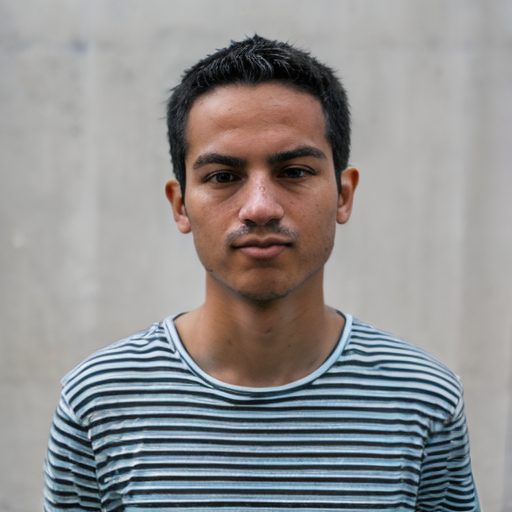

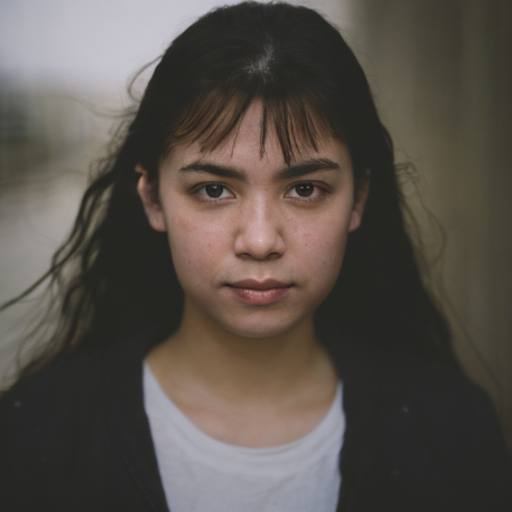

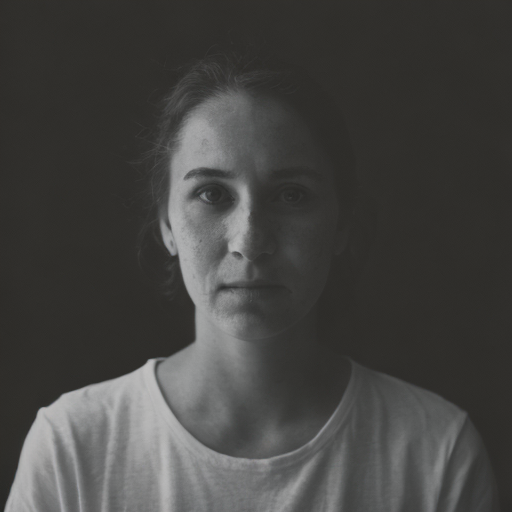

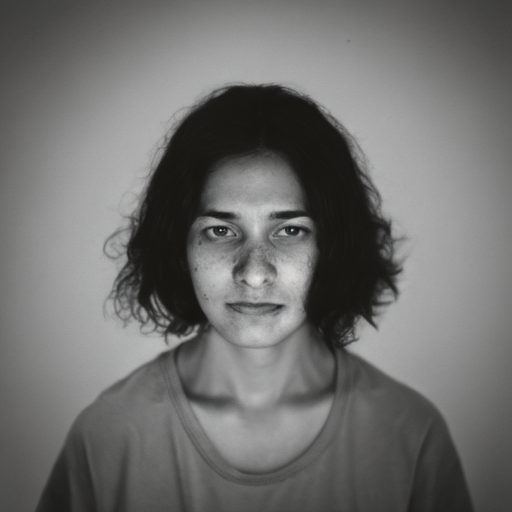

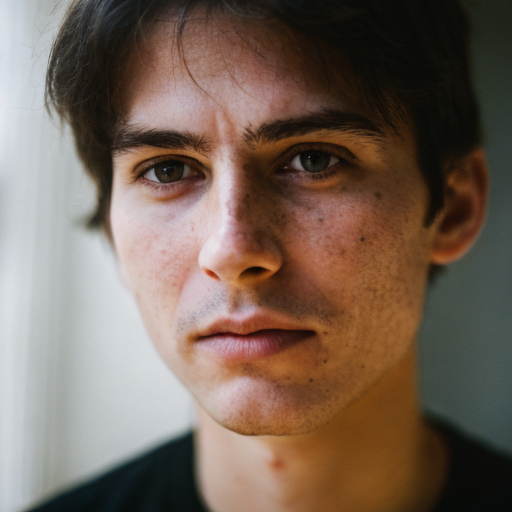

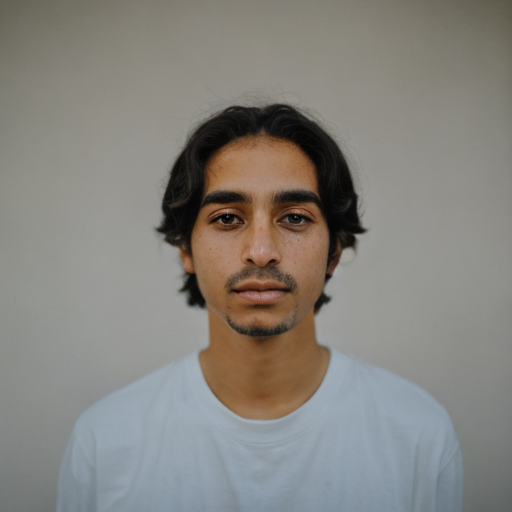

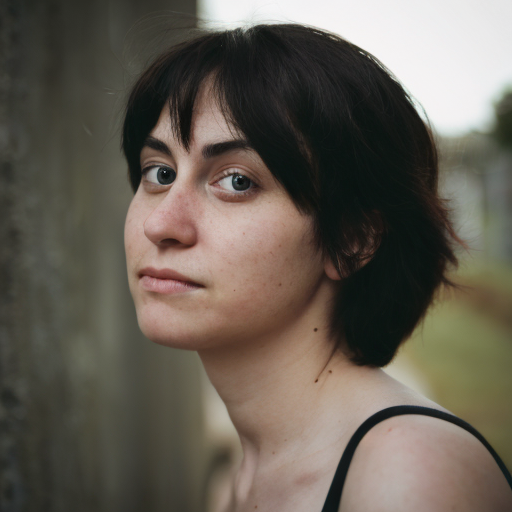

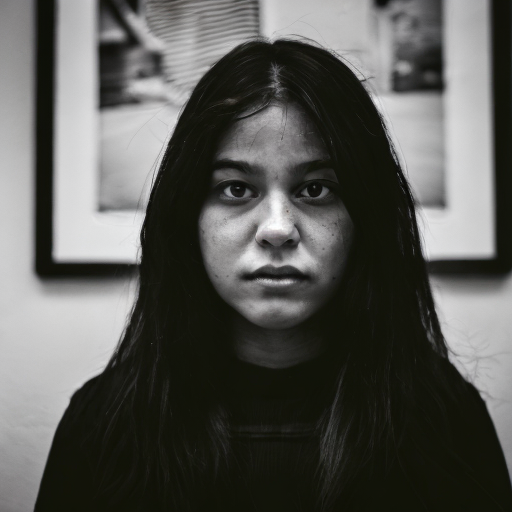

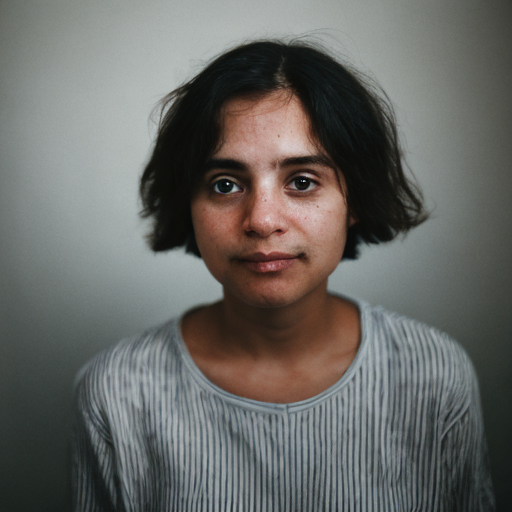

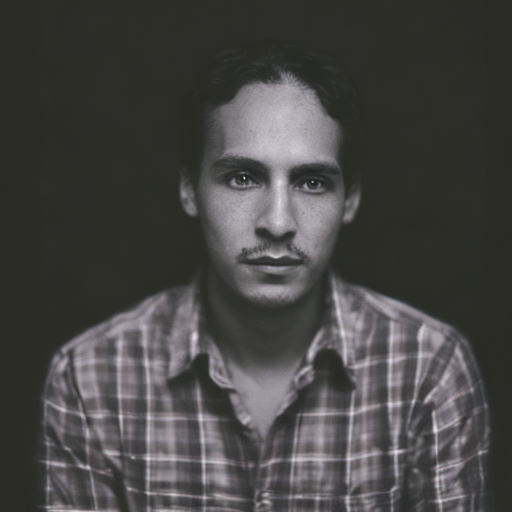

In [10]:
import torch
from diffusers.utils import load_image

image = load_image("/vol/paramonos2/projects/antoni/code/Personal/Old/generating_laugh/bigata_antoni_cropped.png")

with torch.cuda.device(0):
    image = pipeline(
        prompt="a photo portrait of a person",
        # ip_adapter_image=image,
        negative_prompt="",
        num_inference_steps=30,
        guidance_scale=7.0,
        num_images_per_prompt=10,
        height=512,
        width=512,
    ).images
for im in image:
    display(im)

In [ ]:
with torch.cuda.device(0):
    image = pipeline_1_5(
        prompt="a photo portrait of a person",
        # ip_adapter_image=image,
        negative_prompt="",
        num_inference_steps=30,
        guidance_scale=1.0,
        num_images_per_prompt=10,
        height=512,
        width=512,
    ).images
for im in image:
    display(im)

In [ ]:
import torch
from diffusers import StableDiffusionPipeline, DDIMScheduler
from diffusers.utils import load_image

pipeline_2_1 = StableDiffusionPipeline.from_pretrained(
    "stabilityai/stable-diffusion-2-base",
    torch_dtype=torch.float16,
    cache_dir="/vol/paramonos2/projects/antoni/.cache",
).to("cuda")

In [ ]:
pipeline_2_1.lora_state_dict(
    "/vol/paramonos2/projects/antoni/code/Personal/generative-models/checkpoints/SANDRA_Realistic_face_v.1.safetensors"
)

In [ ]:
import torch
from diffusers.utils import load_image

image = load_image("/vol/paramonos2/projects/antoni/code/Personal/Old/generating_laugh/bigata_antoni_cropped.png")

with torch.cuda.device(0):
    image = pipeline_2_1(
        prompt="(24yo woman:1.2), redhead, ginger with bangs and wavy hair, blue eyes, smiling, slim, (freckles:0.8), very long wavy hair, goddess, transparent oversized t-shirt, pointy breasts, covered nipples, white panties,dutch angle, masterpiece, best quality, high quality, professional quality, highly detailed, highres, perfect lighting, natural lighting, ultra-detailed masterpiece, <lora:add_detail:0.8>",
        # ip_adapter_image=image,
        negative_prompt="",
        num_inference_steps=50,
    ).images[0]
image